<a href="https://colab.research.google.com/github/lashkami2020/Unsupervised-Algorithm/blob/main/Unsupervised_Algorithms_Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clustering Algorithms in Mental Health Data Analysis

**1.Introduction**

 Mental health refers to a state of psychological well-being that empowers individuals to manage life's challenges, recognize their potential, learn effectively, perform productively, and actively contribute to their communities. It is a fundamental aspect of overall health and well-being, supporting our capacity to make decisions, foster relationships, and influence the world around us. Mental health is a fundamental human right and plays a vital role in personal growth, community cohesion, and socio-economic progress.

How does clustering help in organizing data?

When you're trying to learn about something, say paintings, one approach might be to look for meaningful groups or collections. You might organize paintings by style, while your friend might organize them by the artist’s era. How you choose to group items helps you to understand more about them as individual works of art. You might find that you have a deep appreciation for abstract art and further break down the style into different techniques or art from various regions. On the other hand, your friend might explore art from the Renaissance period and understand how it was influenced by the historical and cultural context. In both cases, you and your friend have learned something fascinating about art, even though you took different approaches. In machine learning too, we often group examples as a first step to understand a subject (data set) in a machine learning system. Grouping unlabeled examples is called clustering.

How can clustering improve mental health treatment outcomes?

People's needs evolve over time, especially throughout their treatment. A payment system for mental healthcare must accommodate the varying levels of care provided during fluctuating and unpredictable treatment episodes. To achieve this, it is crucial that individuals are not only assessed and grouped at the time of referral, but also reassessed and regrouped periodically. In practice, this means evaluating and clustering individuals at: 1- The conclusion of the initial assessment (usually within 2 contacts). 2- During all scheduled CPA or other formal care reviews. 3- At any point where a significant change in the planned care is required (e.g., unplanned reviews, emergency admissions, etc.). Organizations should clarify who is responsible for the clustering process, especially when multiple professionals are involved.

The algorithms used for this project are:

**MiniBatchKMeans:** A faster variant of KMeans that uses small random batches for centroid updates.

**Agglomerative Clustering:** A hierarchical approach that merges clusters based on proximity, ideal for smaller datasets.

**Birch:** A scalable clustering algorithm designed for large datasets, which builds a tree-like structure to summarize the data.

**DBSCAN**: A density-based method that groups closely packed data points and identifies noise, without needing the number of clusters specified.

**KMeans:** A well-known partitioning algorithm that assigns data points to K predefined clusters based on their proximity to centroids.

**MeanShift:** A density-based algorithm that shifts data points toward regions of higher density, suitable for identifying clusters of arbitrary shapes.

**Spectral Clustering:** A graph-based algorithm that uses eigenvalues of a similarity matrix for dimensionality reduction and then applies traditional clustering techniques like KMeans."



**2. Import Libraries**

In [ ]:
!pip install kneed


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

**3. Import Dataset**

In [ ]:
Data1 = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")

In [ ]:
df = pd.DataFrame(Data1)

**4. Data Characteristics Overview**

In [ ]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [ ]:
df = df.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating'})

In [ ]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df : Mental illness dataframe"' + color.END)
print(describe(df))

"The describe table of df : Mental illness dataframe"
        variable    dtype  count  unique  missing value
0         Entity   object   6420     214              0
1           Code   object   6420     206            270
2           Year    int64   6420      30              0
3  Schizophrenia  float64   6420    6406              0
4     Depressive  float64   6420    6416              0
5        Anxiety  float64   6420    6417              0
6        Bipolar  float64   6420    6385              0
7         Eating  float64   6420    6417              0


In [ ]:
df

Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0     Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1     Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2     Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3     Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4     Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   
...           ...  ...   ...            ...         ...       ...       ...   
6415     Zimbabwe  ZWE  2015       0.201042    3.407624  3.184012  0.538596   
6416     Zimbabwe  ZWE  2016       0.201319    3.410755  3.187148  0.538593   
6417     Zimbabwe  ZWE  2017       0.201639    3.411965  3.188418  0.538589   
6418     Zimbabwe  ZWE  2018       0.201976    3.406929  3.172111  0.538585   
6419     Zimbabwe  ZWE  2019       0.202482    3.395476  3.137017  0.538580   

        Eating  
0     0.127700  
1     0.123256  
2     0.118844  
3     0.115089  
4     0.111815  
...        ...  
6415  0.095652  
6416  0.096662  
6417  0.097330  
6418  0.097909  
6419  0.098295  

[6420 rows x 8 columns]

**5. Feature selection**

In this dataset, we only use 5 variables. Schizophrenia, Depressive, Anxiety, Bipolar and Eating

**6- Plotly visualizations**

Using Plotly-scatter, each data point is visualized as a marker, with its position determined by the x and y coordinates. This plot is applied to display the five primary variables discussed in Section 5.

In [ ]:
fig1 = px.scatter(df, x="Schizophrenia", y="Depressive", color="Anxiety", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig1.show()
fig2 = px.scatter(df, x="Depressive", y="Anxiety", color="Bipolar", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig2.show()
fig3 = px.scatter(df, x="Anxiety", y="Bipolar", color="Eating", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig3.show()
fig4 = px.scatter(df, x="Bipolar", y="Eating", color="Schizophrenia", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig4.show()

A scatterplot matrix is a grid of scatter plots representing the relationships between multiple numerical variables,
𝑋1, 𝑋2,..., Xn, all of equal length. Each cell in the matrix shows the scatter plot of variable 𝑋i
plotted against variable Xj.
 .

In [ ]:
fig = px.scatter_matrix(df, dimensions=["Schizophrenia", "Depressive", "Anxiety",
                                        "Bipolar"], color="Eating")
fig.show()

In descriptive statistics, a box plot (or boxplot) is a graphical technique used to illustrate the distribution, range, and skewness of numerical data by showing their quartiles. In addition to the central box, the plot may include lines, referred to as whiskers, that extend from the box to represent variability outside the upper and lower quartiles. This visualization is often called the box-and-whisker plot or box-and-whisker diagram.

**7- Seaborn visualizations**

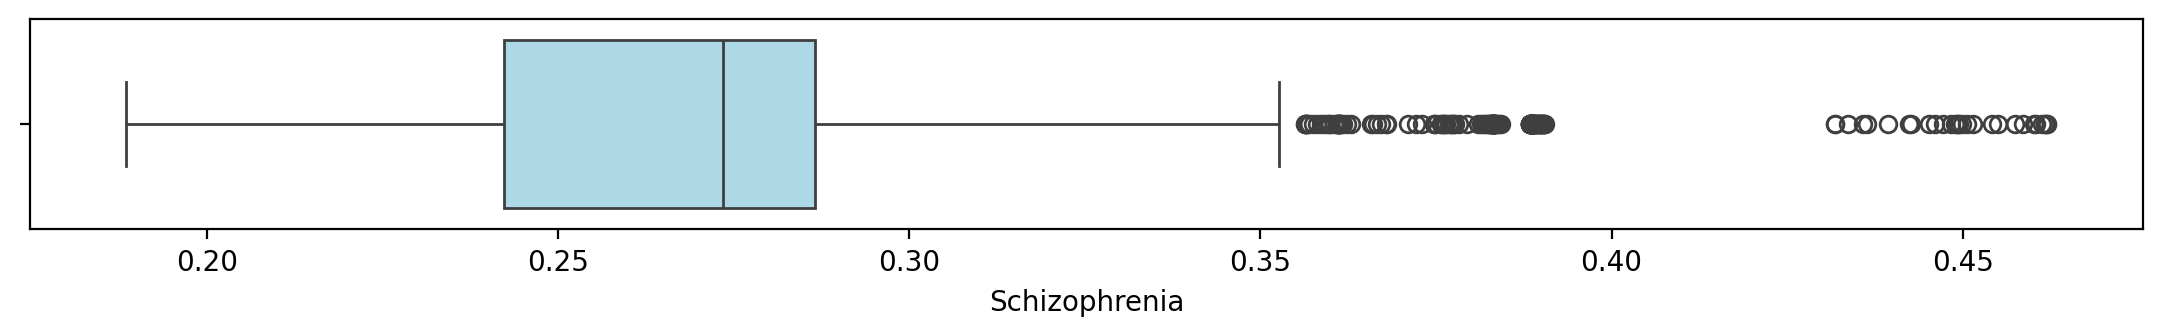

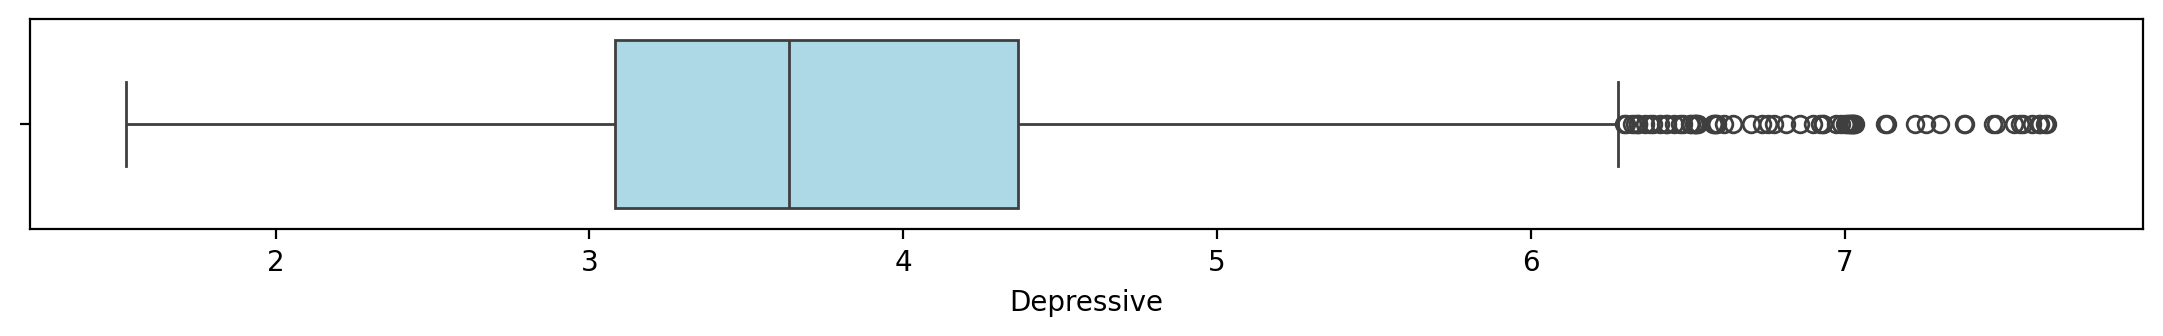

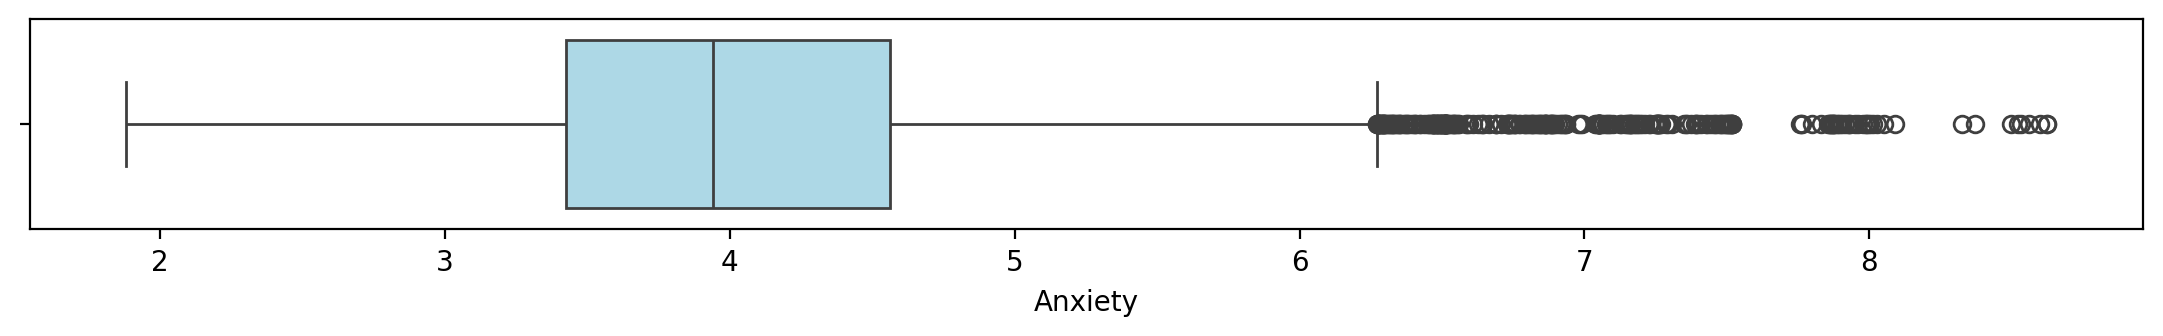

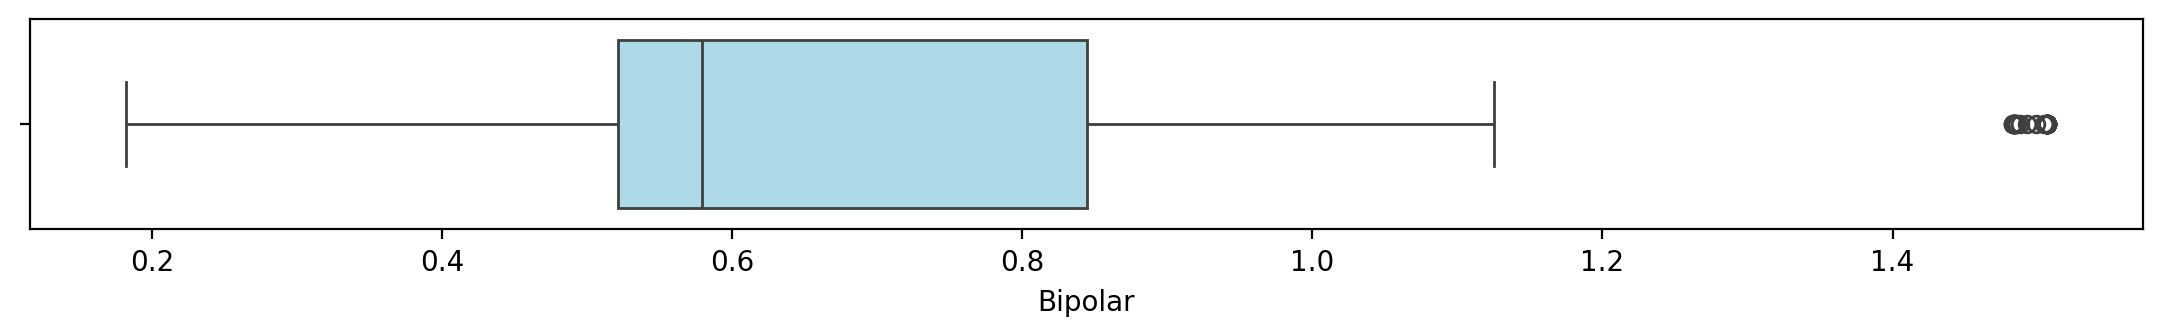

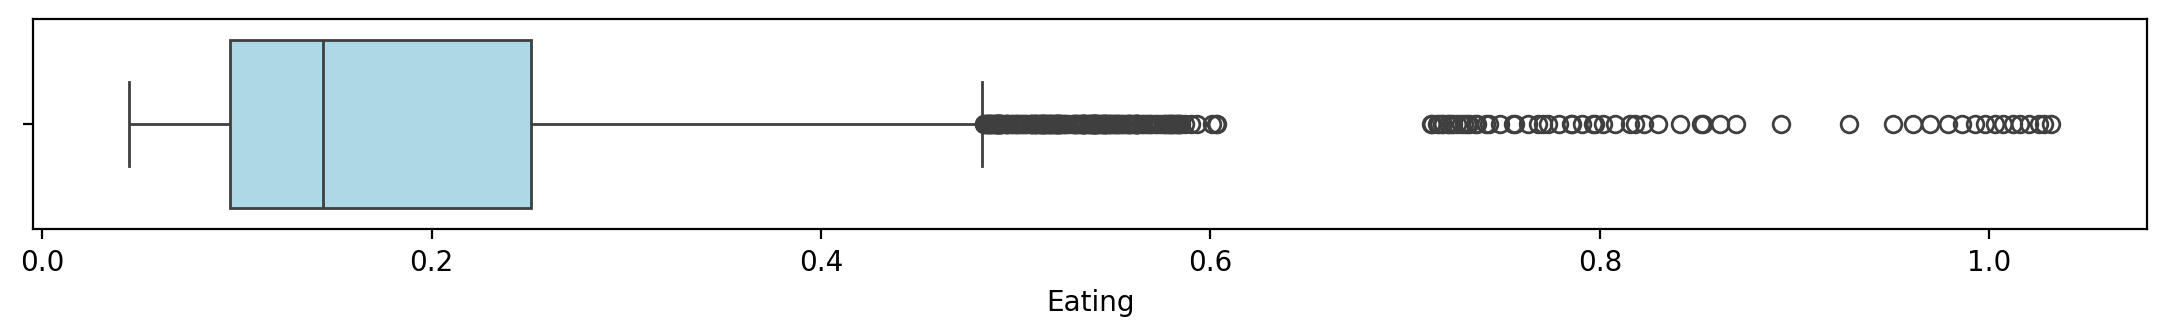

In [ ]:
Numerical = ['Schizophrenia', 'Depressive','Anxiety','Bipolar','Eating']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df,
           boxprops = dict(facecolor = "lightblue"))
    i += 1
    plt.show()

Correlation matrices are a crucial component of exploratory data analysis. Correlation heatmaps present the same information in a more visually engaging format. Additionally, they allow us to quickly identify which variables are correlated, the strength and direction of the correlation, and highlight potential issues with multicollinearity.

<Axes: >

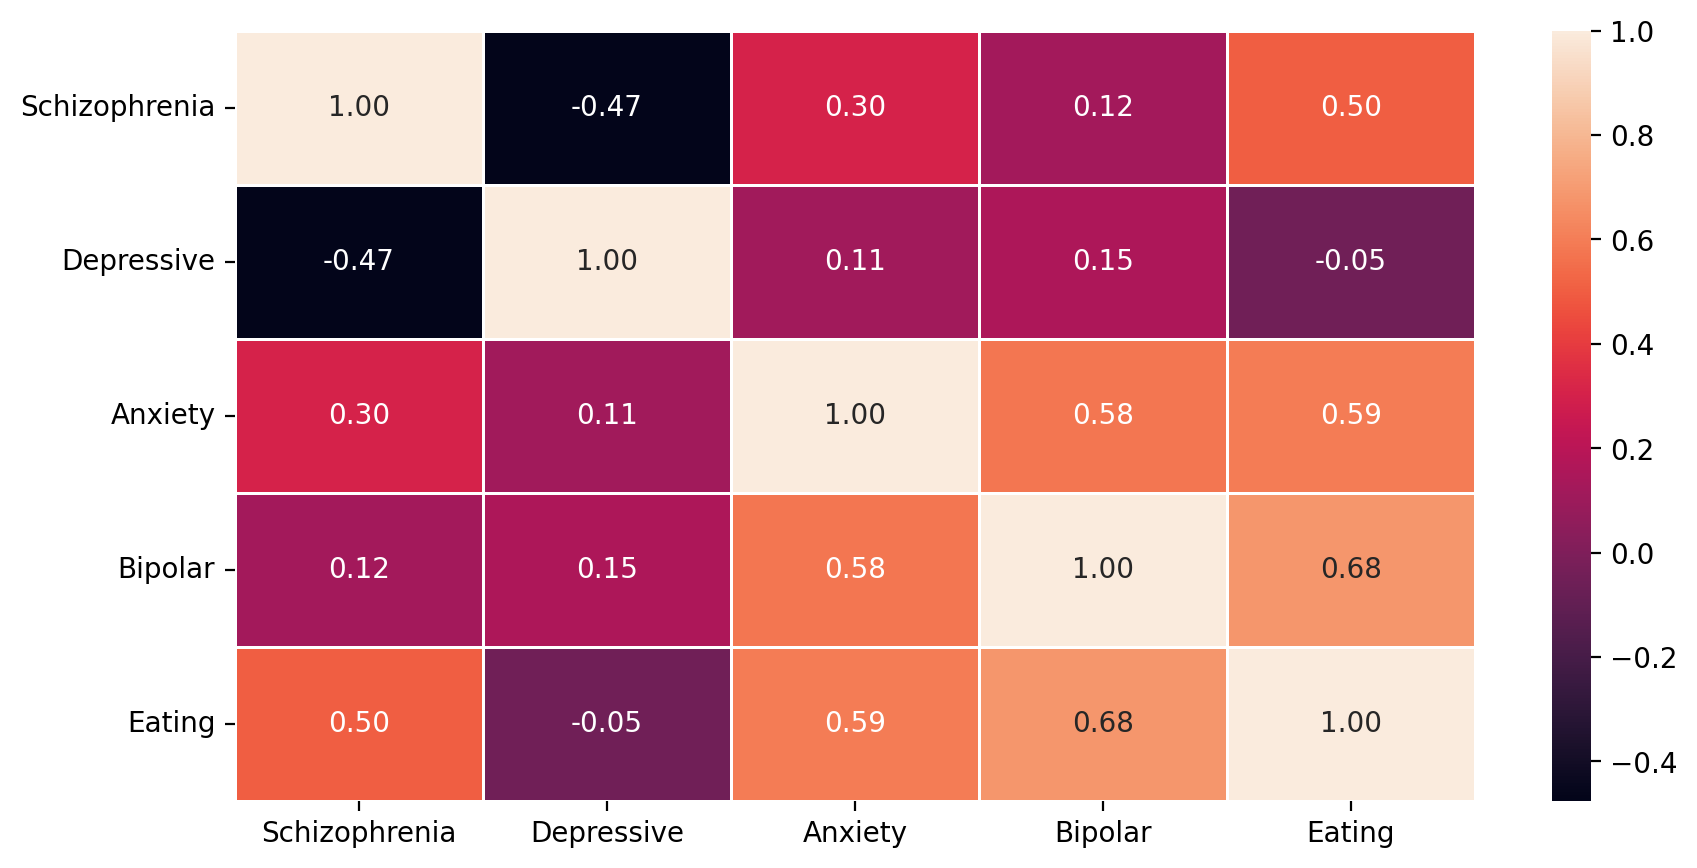

In [ ]:
Corrmat = df[Numerical].corr()
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

**8- Machine learning models**

In [ ]:
features = ['Schizophrenia', 'Depressive','Anxiety','Bipolar','Eating']

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
!pip install --upgrade matplotlib

**8-1 MiniBatchKMeans**


The core concept of the Mini Batch K-means algorithm is to use small, random batches of data with a fixed size that can be stored in memory. In each iteration, a new random sample is drawn from the dataset and used to update the clusters. This process continues until convergence. Each mini-batch adjusts the clusters by combining the values of the prototypes and the data, with a learning rate that decreases as iterations progress. This learning rate is inversely proportional to the number of data points assigned to a cluster. As the number of iterations increases, the impact of new data diminishes, allowing convergence to be detected when no changes occur in the clusters over several consecutive iterations.

   Schizophrenia  Depressive   Anxiety   Bipolar    Eating  Cluster
0       0.223206    4.996118  4.713314  0.703023  0.127700        2
1       0.222454    4.989290  4.702100  0.702069  0.123256        2
2       0.221751    4.981346  4.683743  0.700792  0.118844        2
3       0.220987    4.976958  4.673549  0.700087  0.115089        2
4       0.220183    4.977782  4.670810  0.699898  0.111815        2


<Figure size 2000x1000 with 0 Axes>

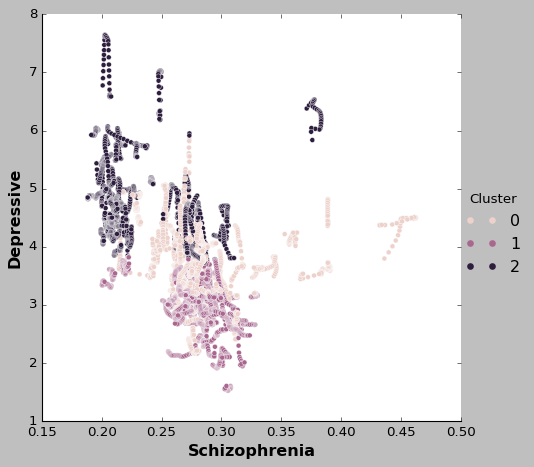

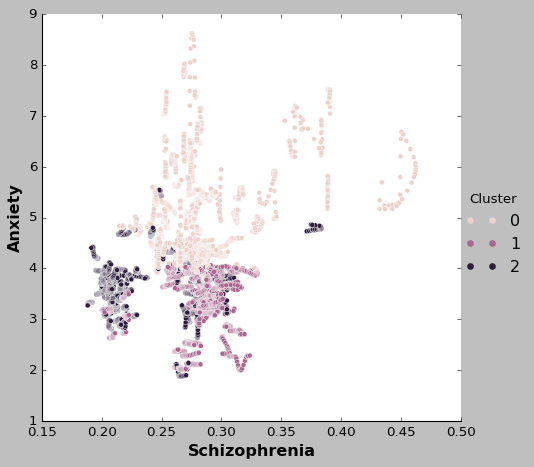

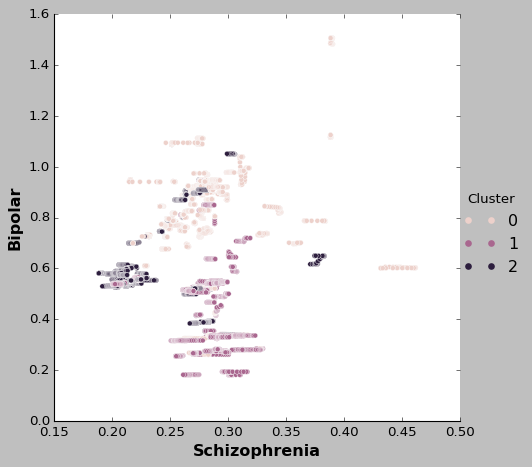

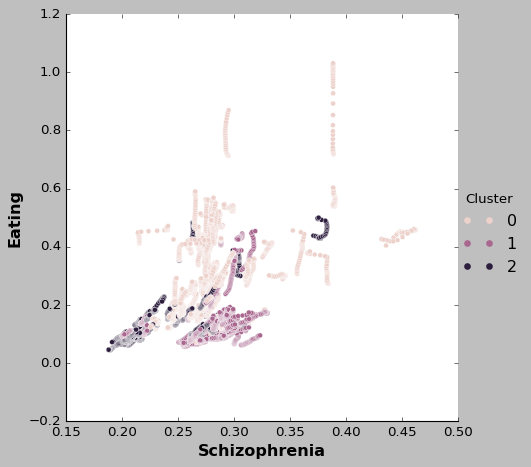

In [ ]:
X_model_MiniB = df[features]
X_model_MiniB = pd.DataFrame(X_model_MiniB)
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6)
X_model_MiniB["Cluster"] = kmeans.fit_predict(X_model_MiniB)
X_model_MiniB["Cluster"] = X_model_MiniB["Cluster"].astype("int")
print(X_model_MiniB.head())
plt.figure(figsize=(10,5), dpi=200)
plt.style.use('classic')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x='Schizophrenia', y='Depressive', hue='Cluster', data=X_model_MiniB, height=6)
sns.relplot(x='Schizophrenia', y='Anxiety', hue='Cluster', data=X_model_MiniB, height=6)
sns.relplot(x='Schizophrenia', y='Bipolar', hue='Cluster', data=X_model_MiniB, height=6)
sns.relplot(x='Schizophrenia', y='Eating', hue='Cluster', data=X_model_MiniB, height=6)
plt.show()


In [ ]:
X_model_MiniB

Schizophrenia  Depressive   Anxiety   Bipolar    Eating  Cluster
0          0.223206    4.996118  4.713314  0.703023  0.127700        2
1          0.222454    4.989290  4.702100  0.702069  0.123256        2
2          0.221751    4.981346  4.683743  0.700792  0.118844        2
3          0.220987    4.976958  4.673549  0.700087  0.115089        2
4          0.220183    4.977782  4.670810  0.699898  0.111815        2
...             ...         ...       ...       ...       ...      ...
6415       0.201042    3.407624  3.184012  0.538596  0.095652        1
6416       0.201319    3.410755  3.187148  0.538593  0.096662        1
6417       0.201639    3.411965  3.188418  0.538589  0.097330        1
6418       0.201976    3.406929  3.172111  0.538585  0.097909        1
6419       0.202482    3.395476  3.137017  0.538580  0.098295        1

[6420 rows x 6 columns]

In [ ]:
X_model_MiniB["Cluster"].value_counts()

Cluster
0    2517
1    2022
2    1881
Name: count, dtype: int64

In [ ]:
df_Mini_C_0 = X_model_MiniB[X_model_MiniB["Cluster"]==0]
df_Mini_C_1 = X_model_MiniB[X_model_MiniB["Cluster"]==1]
df_Mini_C_2 = X_model_MiniB[X_model_MiniB["Cluster"]==2]
print(color.BOLD + color.BLUE +
      'The Min and Max of Schizophrenia in Cluster = 0 : ' + color.END)
print(df_Mini_C_0["Schizophrenia"].min(), "and", df_Mini_C_0["Schizophrenia"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Schizophrenia in Cluster = 1 : ' + color.END)
print(df_Mini_C_1["Schizophrenia"].min(), "and", df_Mini_C_1["Schizophrenia"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Schizophrenia in Cluster = 2 : ' + color.END)
print(df_Mini_C_2["Schizophrenia"].min(), "and", df_Mini_C_2["Schizophrenia"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Depressive in Cluster = 0 : ' + color.END)
print(df_Mini_C_0["Depressive"].min(), "and", df_Mini_C_0["Depressive"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Depressive in Cluster = 1 : ' + color.END)
print(df_Mini_C_1["Depressive"].min(), "and", df_Mini_C_1["Depressive"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Depressive in Cluster = 2 : ' + color.END)
print(df_Mini_C_2["Depressive"].min(), "and", df_Mini_C_2["Depressive"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Anxiety in Cluster = 0 : ' + color.END)
print(df_Mini_C_0["Anxiety"].min(), "and", df_Mini_C_0["Anxiety"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Anxiety in Cluster = 1 : ' + color.END)
print(df_Mini_C_1["Anxiety"].min(), "and", df_Mini_C_1["Anxiety"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Anxiety in Cluster = 2 : ' + color.END)
print(df_Mini_C_2["Anxiety"].min(), "and", df_Mini_C_2["Anxiety"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Bipolar in Cluster = 0 : ' + color.END)
print(df_Mini_C_0["Bipolar"].min(), "and", df_Mini_C_0["Bipolar"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Bipolar in Cluster = 1 : ' + color.END)
print(df_Mini_C_1["Bipolar"].min(), "and", df_Mini_C_1["Bipolar"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Bipolar in Cluster = 2 : ' + color.END)
print(df_Mini_C_2["Bipolar"].min(), "and", df_Mini_C_2["Bipolar"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Eating in Cluster = 0 : ' + color.END)
print(df_Mini_C_0["Eating"].min(), "and", df_Mini_C_0["Eating"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Eating in Cluster = 1 : ' + color.END)
print(df_Mini_C_1["Eating"].min(), "and", df_Mini_C_1["Eating"].max() )
print("\n")

print(color.BOLD + color.BLUE +
      'The Min and Max of Eating in Cluster = 2 : ' + color.END)
print(df_Mini_C_2["Eating"].min(), "and", df_Mini_C_2["Eating"].max() )
print("\n")

The Min and Max of Schizophrenia in Cluster = 0 : 
0.21458283 and 0.4620453


The Min and Max of Schizophrenia in Cluster = 1 : 
0.20044968 and 0.33005887


The Min and Max of Schizophrenia in Cluster = 2 : 
0.18841599 and 0.3832003


The Min and Max of Depressive in Cluster = 0 : 
2.1591437 and 5.8431926


The Min and Max of Depressive in Cluster = 1 : 
1.5223331 and 3.8224282


The Min and Max of Depressive in Cluster = 2 : 
3.7204535 and 7.6458993


The Min and Max of Anxiety in Cluster = 0 : 
3.7628927 and 8.624634


The Min and Max of Anxiety in Cluster = 1 : 
2.0012987 and 4.126996


The Min and Max of Anxiety in Cluster = 2 : 
1.8799964 and 5.571912


The Min and Max of Bipolar in Cluster = 0 : 
0.2571488 and 1.5067295


The Min and Max of Bipolar in Cluster = 1 : 
0.18166696 and 0.9449035


The Min and Max of Bipolar in Cluster = 2 : 
0.33748543 and 1.0872802


The Min and Max of Eating in Cluster = 0 : 
0.060923122 and 1.0316882


The Min and Max of Eating in Cluster = 1 : 
0.

**8-2 AgglomerativeClustering**


Agglomerative Clustering is a hierarchical clustering method used in unsupervised machine learning. It groups data points into clusters in such a way that points within the same cluster are more similar to each other, while points in different clusters are more distinct.

In [ ]:
cluster_agg = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [ ]:
cluster_agg.fit(df[features])
labels = cluster_agg.labels_

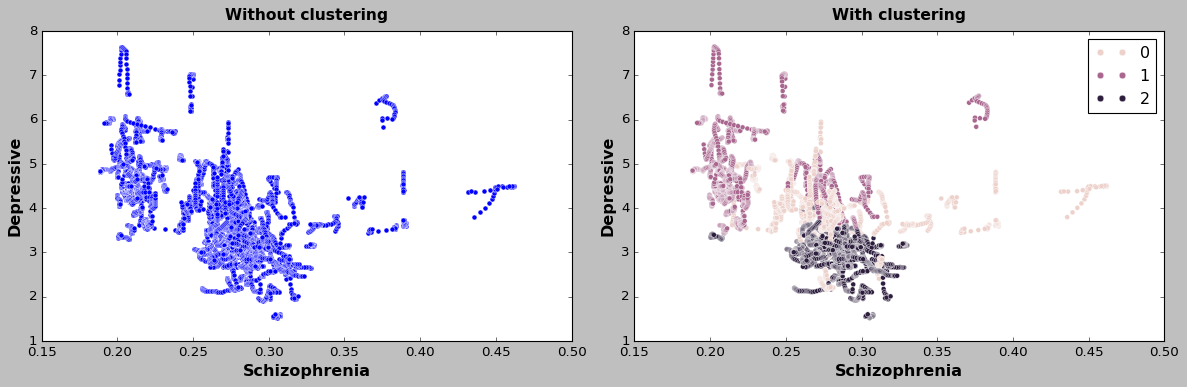

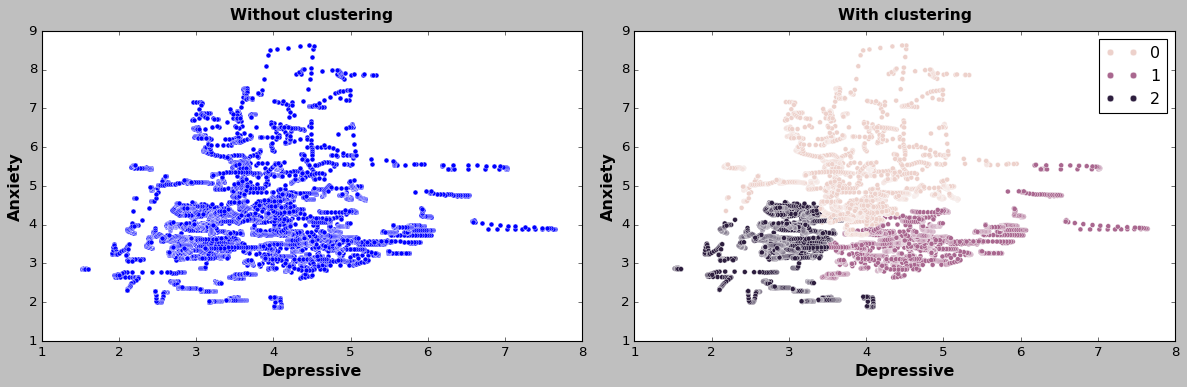

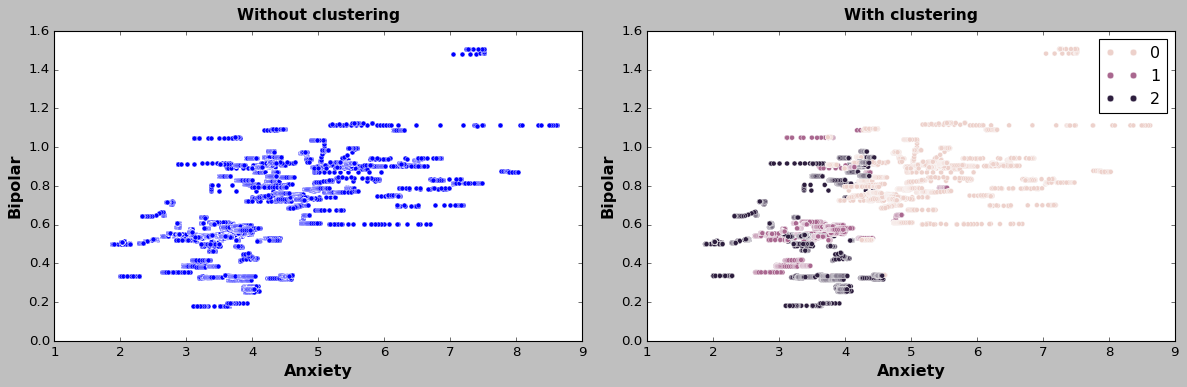

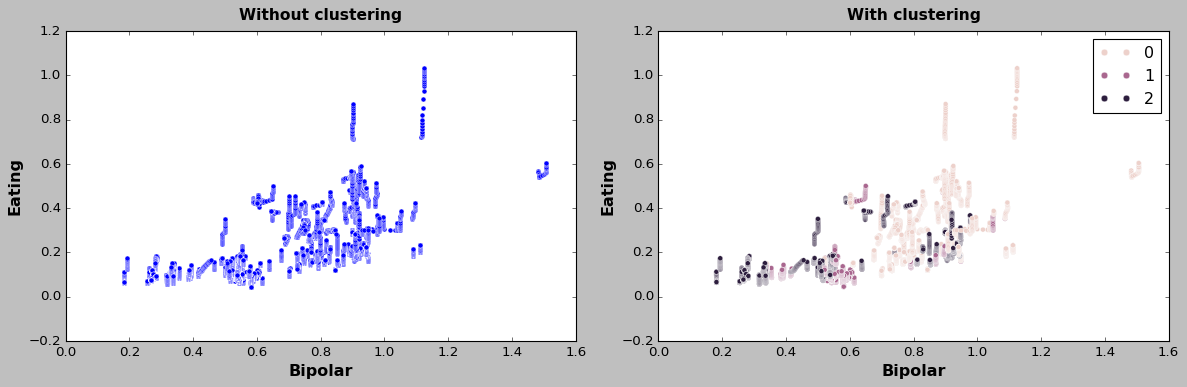

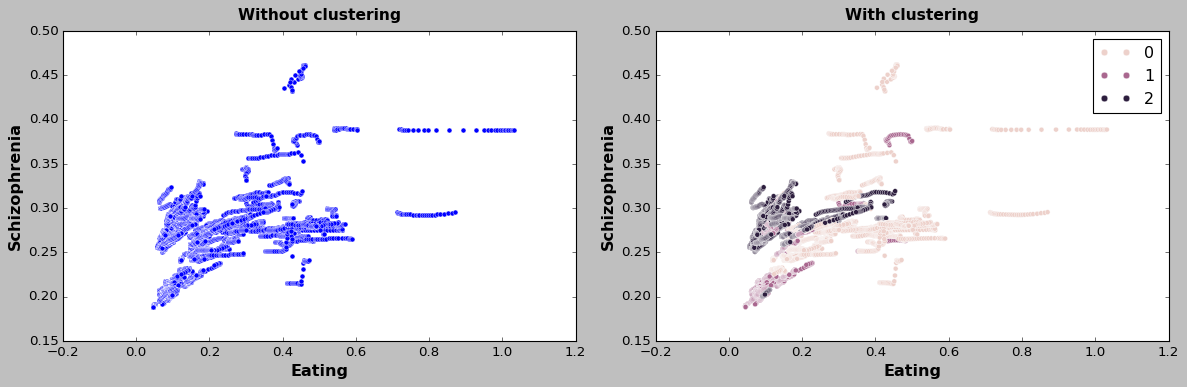

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=cluster_agg.labels_).set_title('With clustering');

**8-3 BIRCH**

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering technique designed to handle large datasets. It works by creating a compact summary of the data that retains most of its information, which is then clustered instead of the full dataset. BIRCH is commonly used in conjunction with other clustering methods, providing a summarized version of the data for the other algorithms to process. However, a significant limitation of BIRCH is that it can only handle metric attributes, meaning it requires attributes that can be represented in Euclidean space, and does not support categorical attributes.

In [ ]:
cluster_birch =Birch(branching_factor=200, threshold = 1).fit(df[features])
print(cluster_birch)

Birch(branching_factor=200, threshold=1)


In [ ]:
labels_b = cluster_birch.labels_

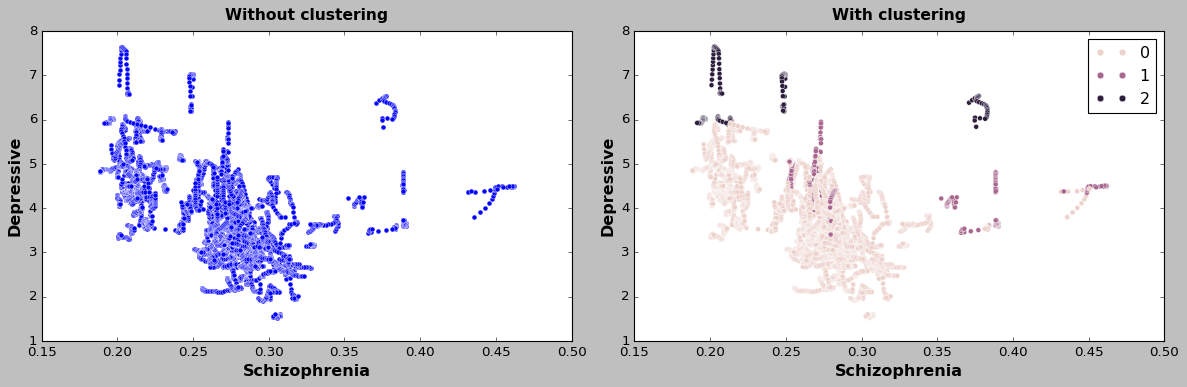

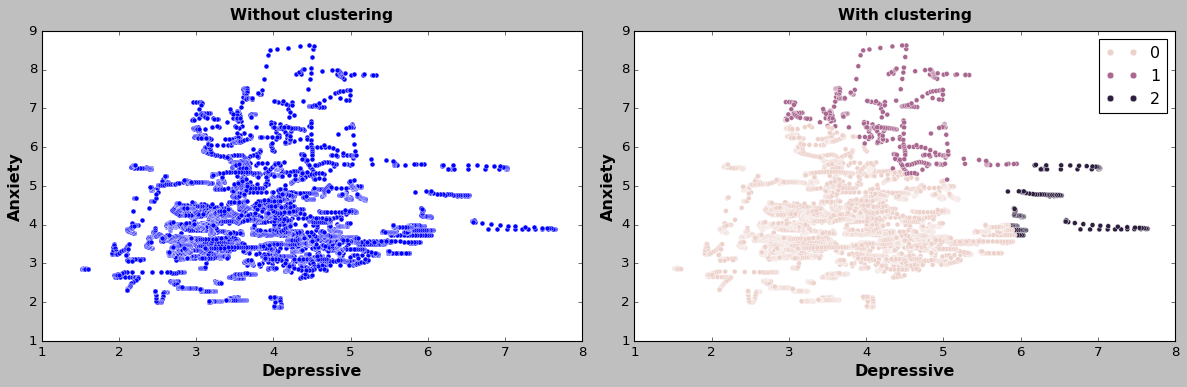

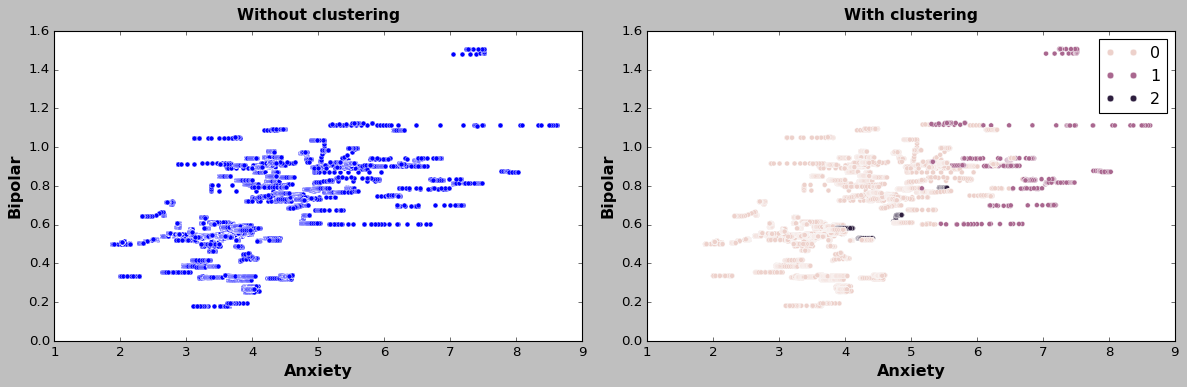

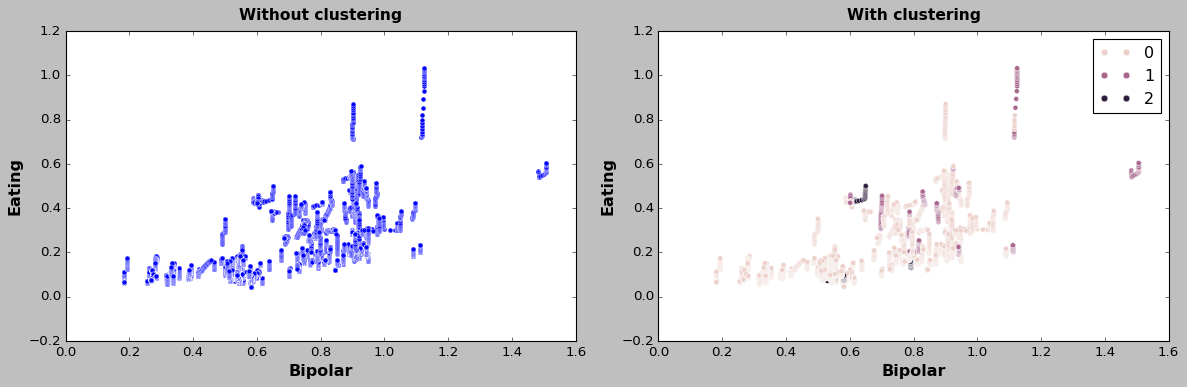

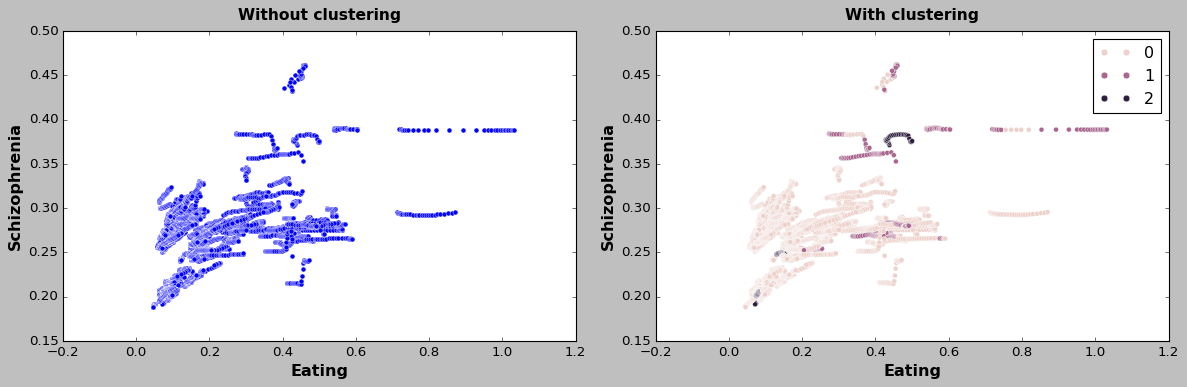

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=labels_b).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=labels_b).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=labels_b).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=labels_b).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=labels_b).set_title('With clustering');

**8-4 DBSCAN**


At its core, all clustering techniques follow a similar approach: first, we compute the similarities between data points and then use these similarities to group the points into clusters or batches. In this context, we will focus on the Density-based Spatial Clustering of Applications with Noise (DBSCAN) method. The DBSCAN algorithm is built around the simple concept of distinguishing between "clusters" and "noise." The primary idea is that for a point to be part of a cluster, its surrounding neighborhood, within a defined radius, must contain at least a minimum number of points.

In [ ]:
cluster_DB = DBSCAN(eps = 0.55, min_samples = 4).fit(df[features])
labels_dB = cluster_DB.labels_
set(cluster_DB.labels_)

{0, 1, 2}

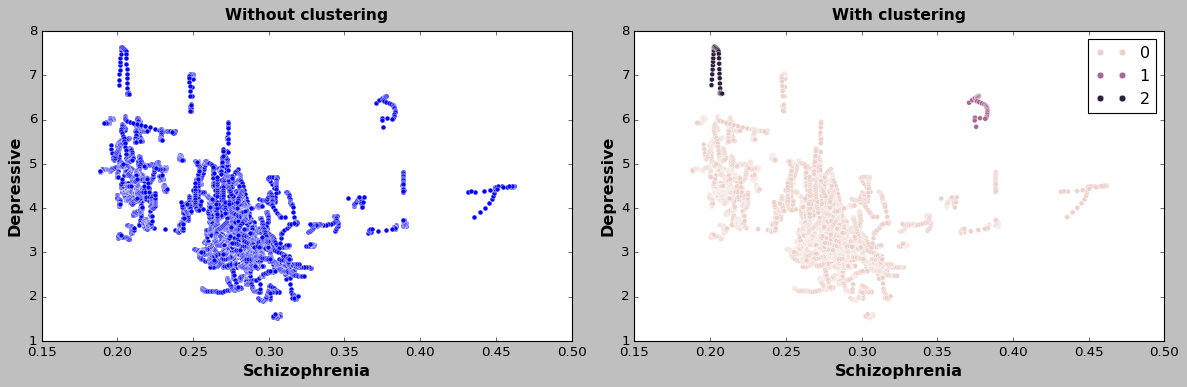

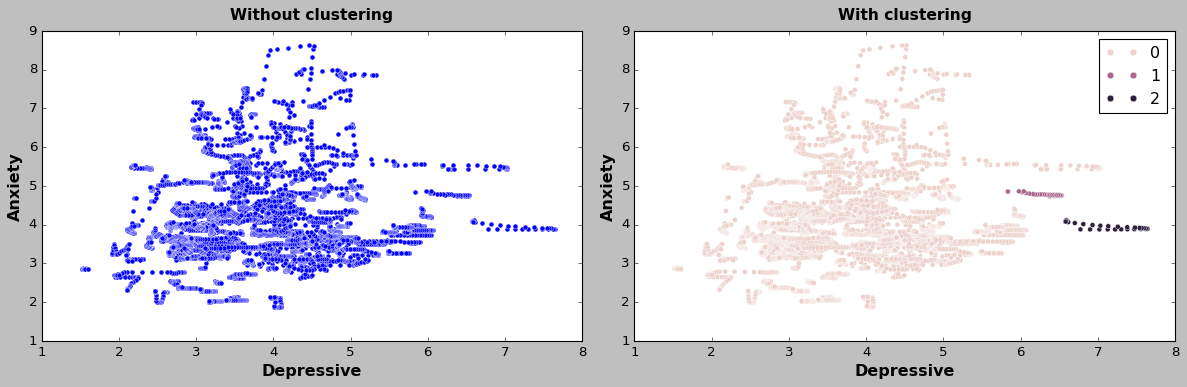

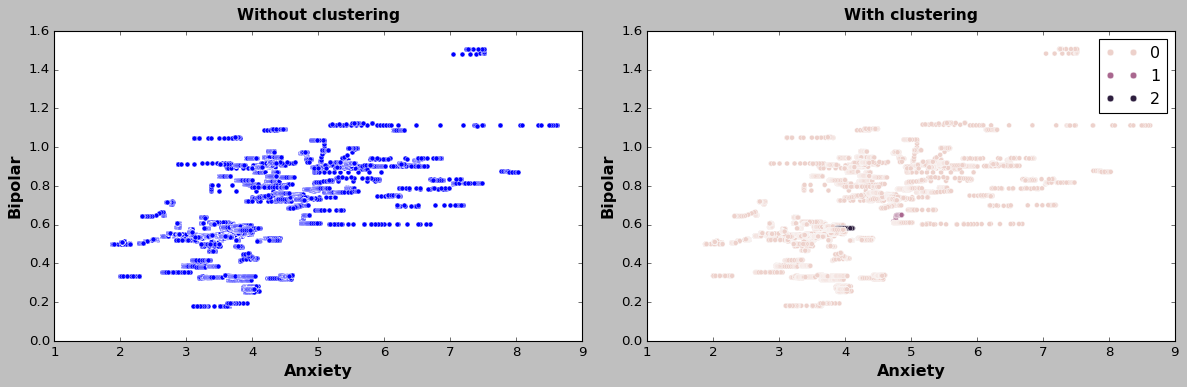

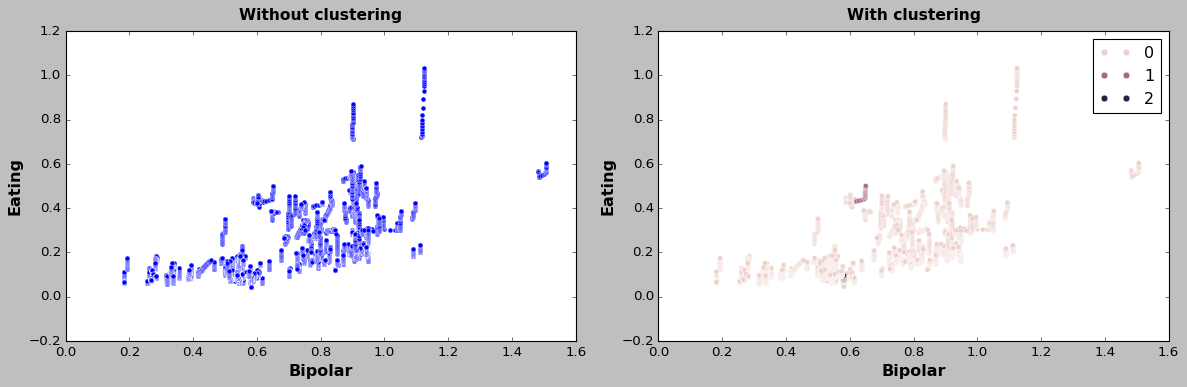

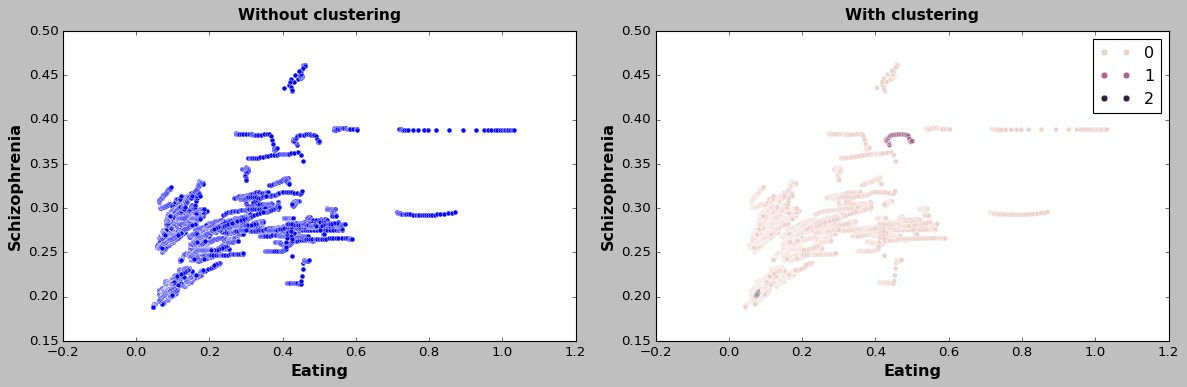

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=labels_dB).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=labels_dB).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=labels_dB).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=labels_dB).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=labels_dB).set_title('With clustering');

**8-5 KMeans**

K-Means Clustering is an unsupervised machine learning algorithm used to partition an unlabeled dataset into distinct clusters. The goal is to categorize the data points into specific groups. To accomplish this, we apply the K-means algorithm, which is an unsupervised learning method. The 'K' in the algorithm's name refers to the number of clusters or groups into which we aim to organize the data.

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
cluster_km = kmeans.fit(df[features])

In [ ]:
cluster_km.inertia_

5264.338975409881

In [ ]:
cluster_km.cluster_centers_

array([[0.29259719, 3.73213459, 5.81180212, 0.89589956, 0.38624739],
       [0.27842957, 3.09096501, 3.61964317, 0.5369792 , 0.15445898],
       [0.23658276, 4.71578302, 3.86085025, 0.63759129, 0.15155227]])

In [ ]:
kmeans_kw = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
iner = []
for k in range (1,10):
    kmeans = KMeans(n_clusters=k, **kmeans_kw)
    kmeans.fit(df[features])
    iner.append(kmeans.inertia_)

Elbow point: The elbow method is a visual technique used to determine the optimal value of ‘K’ in K-means clustering. It involves calculating the Within-Cluster Sum of Squares (WCSS), which is the total squared distance between the points in a cluster and the cluster's centroid.

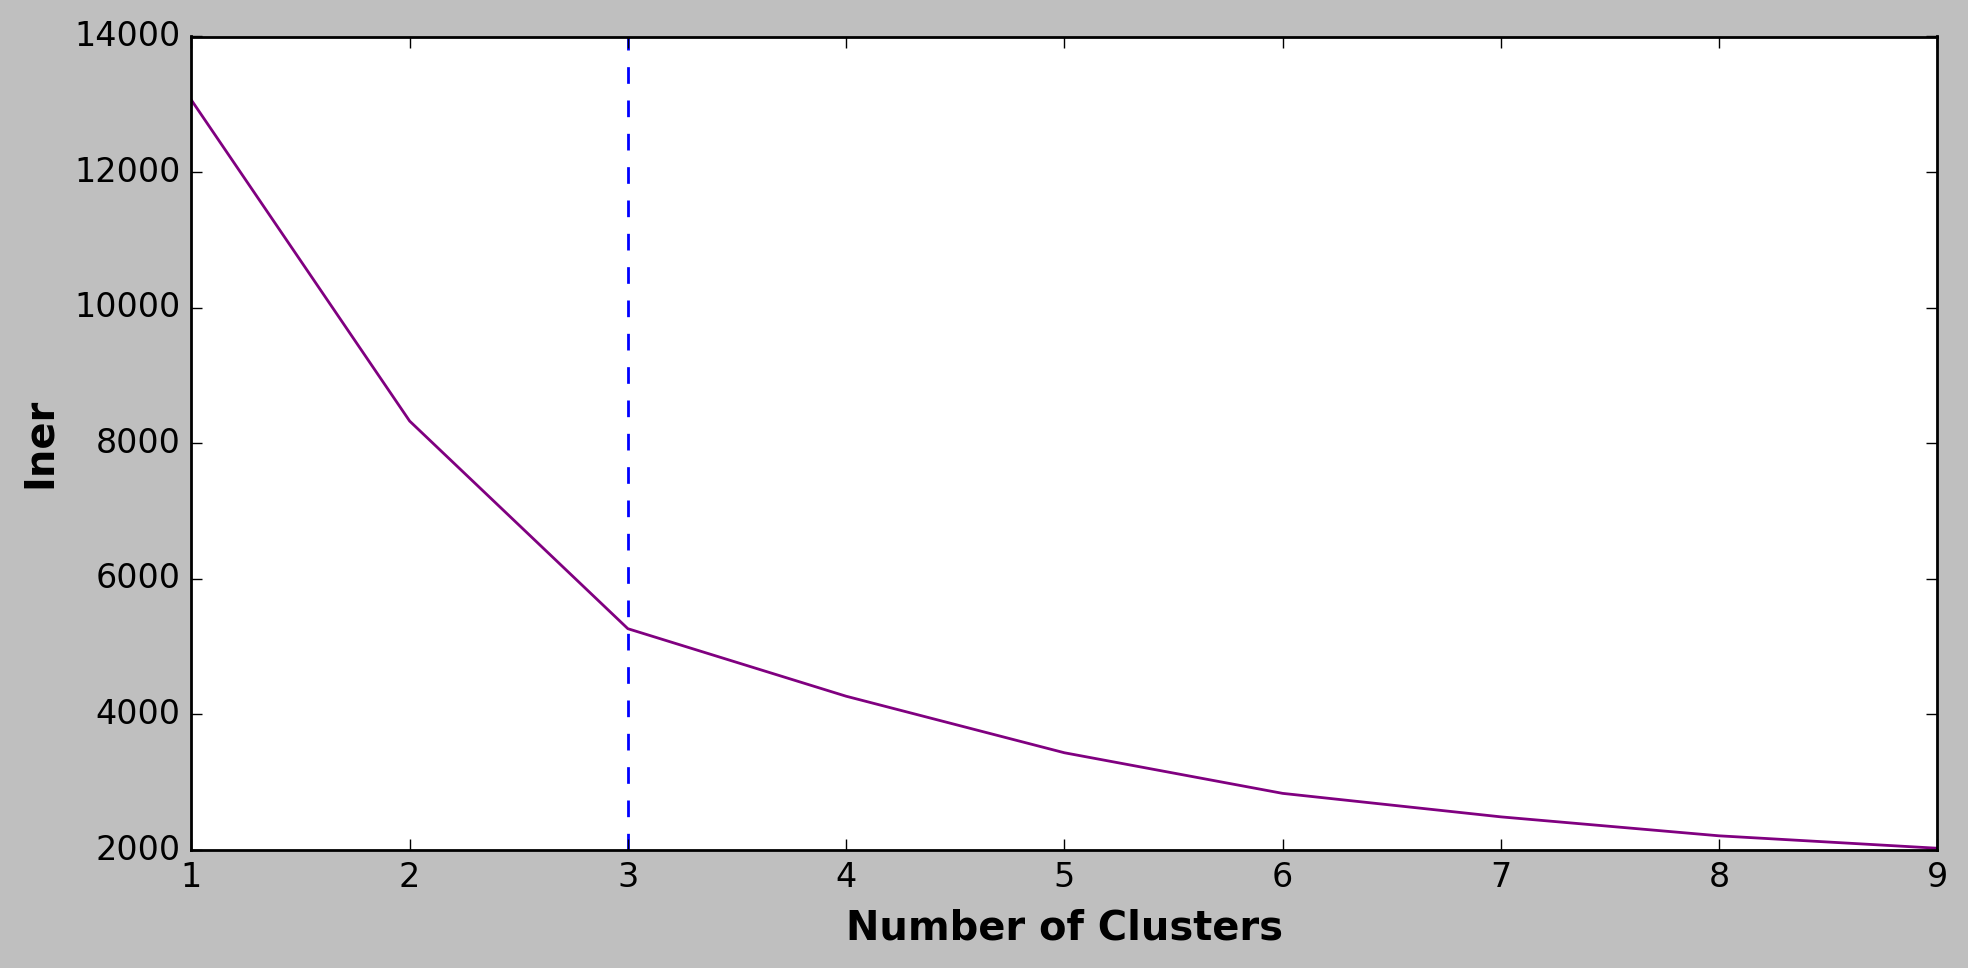

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(range(1, 10), iner, color='purple')
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Iner")
plt.axvline(x = 3, color = 'b', label = 'axvline - full height', linestyle="dashed")
plt.show()

In [ ]:
KL = KneeLocator(range(1,10), iner, curve="convex", direction= "decreasing")
KL.elbow

3


Silhouette coefficient: The Silhouette Coefficient, or silhouette score, is a measure used to evaluate the effectiveness of a clustering method. Its value ranges from -1 to 1. A score of 1 indicates that the clusters are well-separated and clearly distinguishable. A score of 0 suggests that the clusters are indistinguishable or that the distance between them is minimal. A score of -1 indicates that the clusters have been assigned incorrectly.

In [ ]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kw)
    kmeans.fit(df[features])
    score = silhouette_score(df[features], kmeans.labels_)
    silhouette_coefficients.append(score)

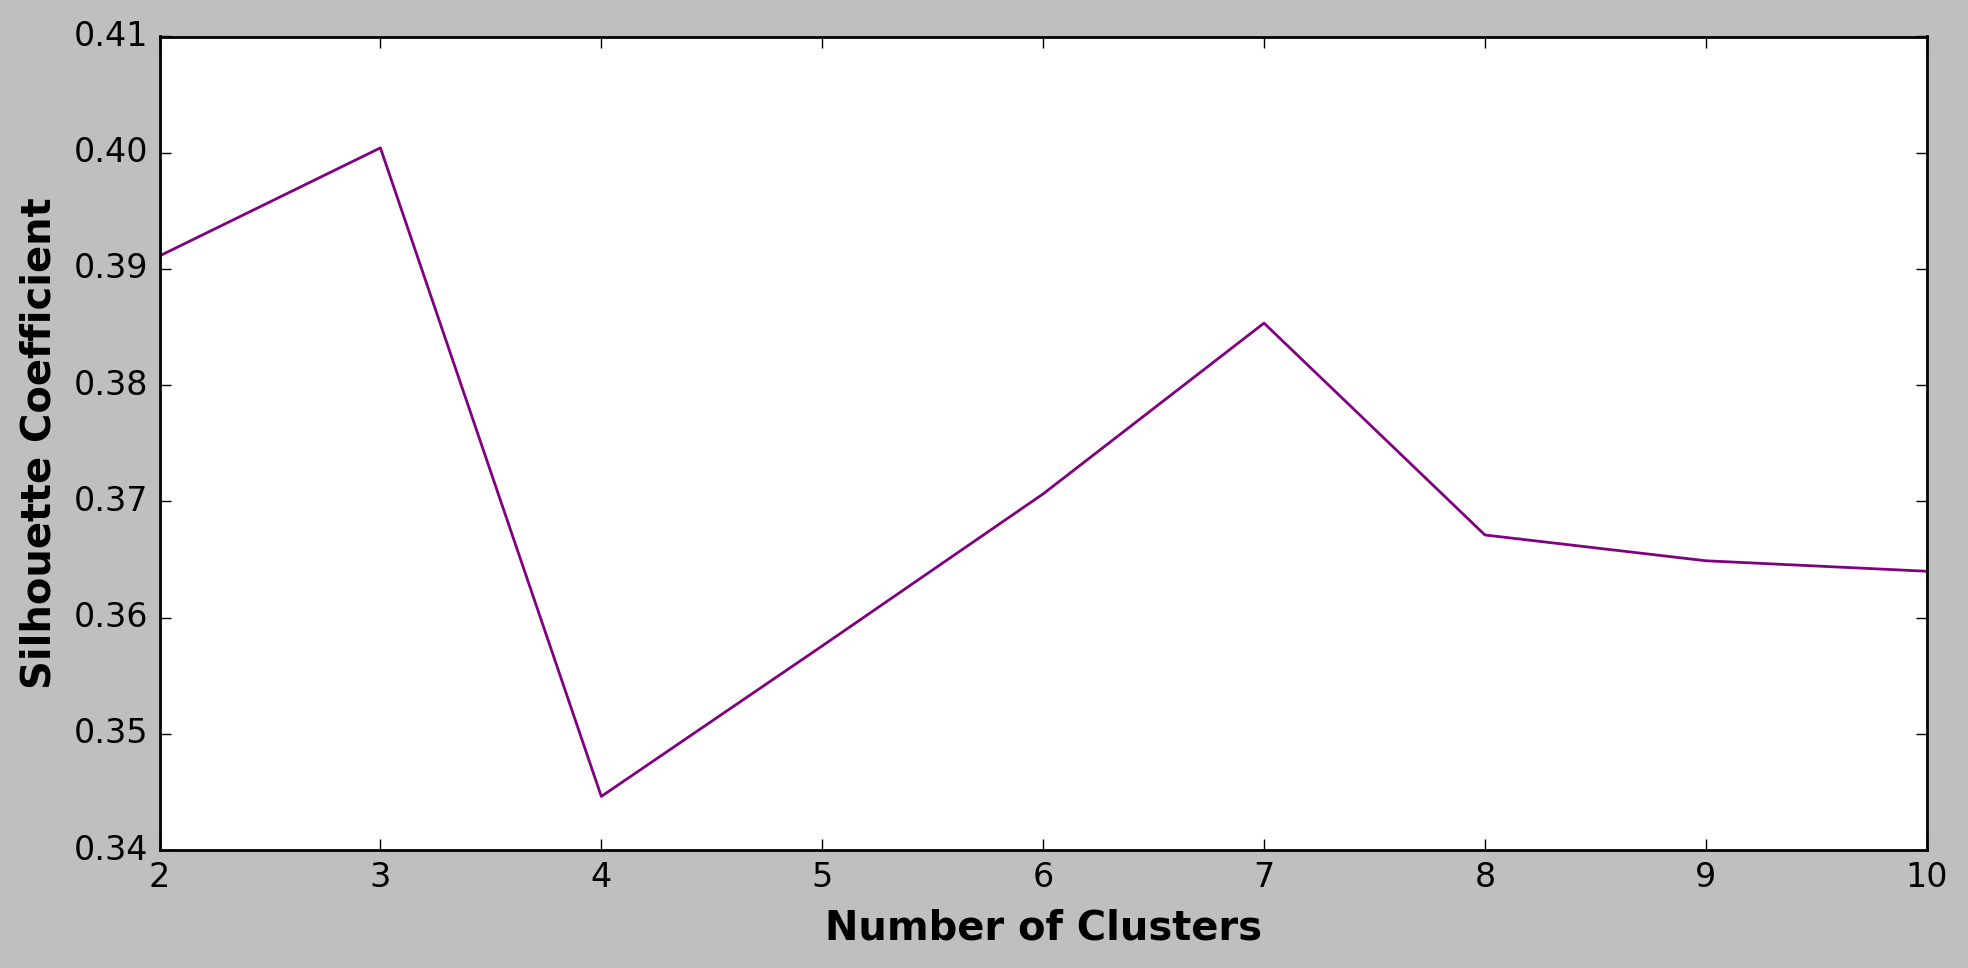

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(range(2, 11), silhouette_coefficients, color='purple')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[features])
labels_Km = kmeans.labels_

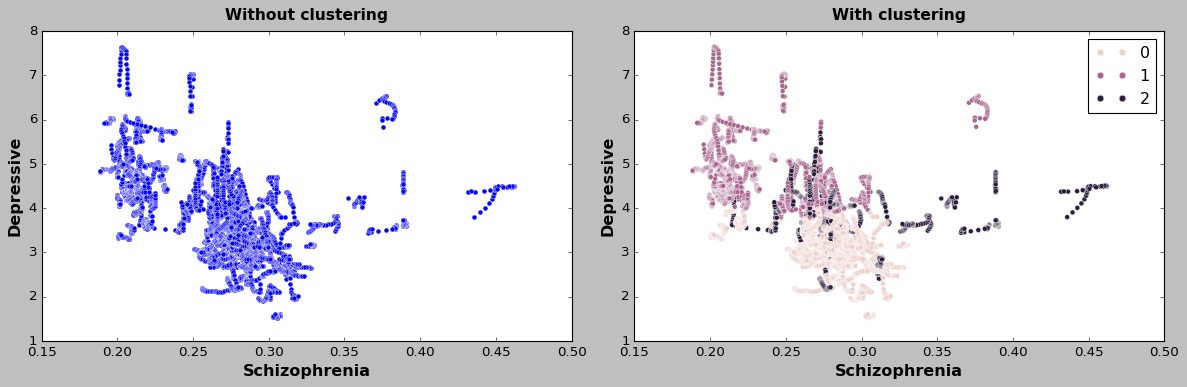

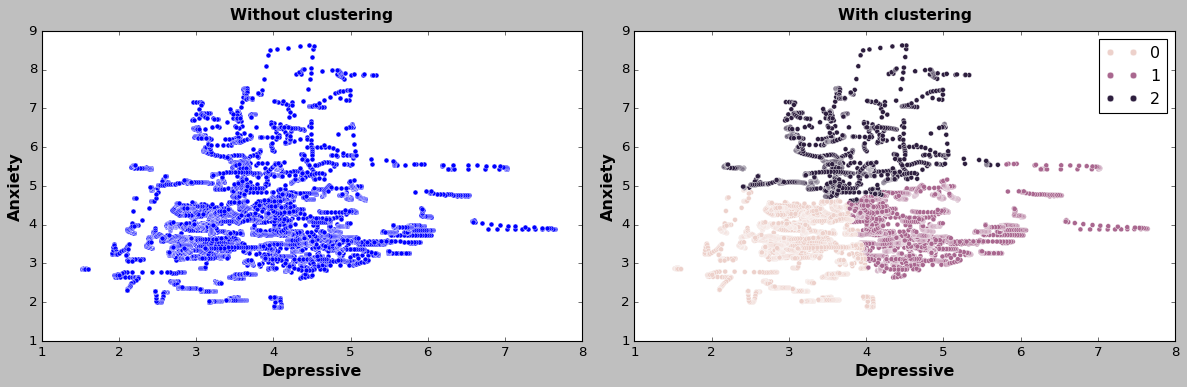

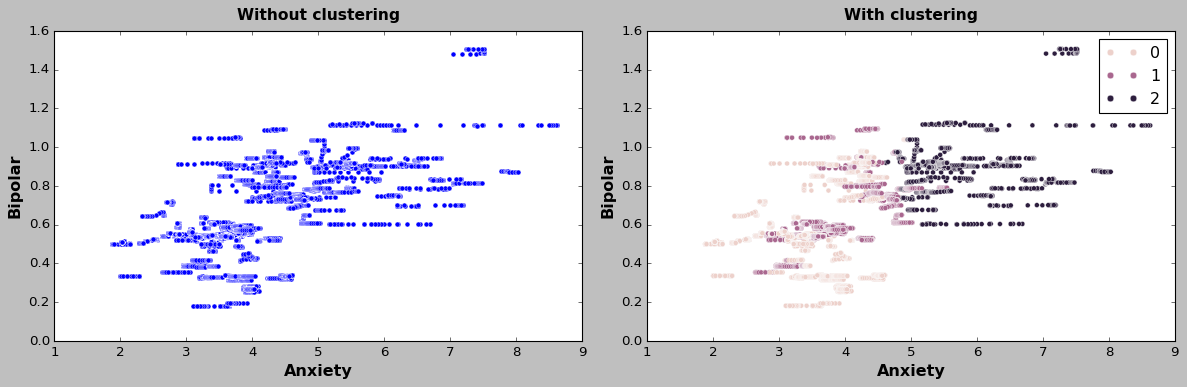

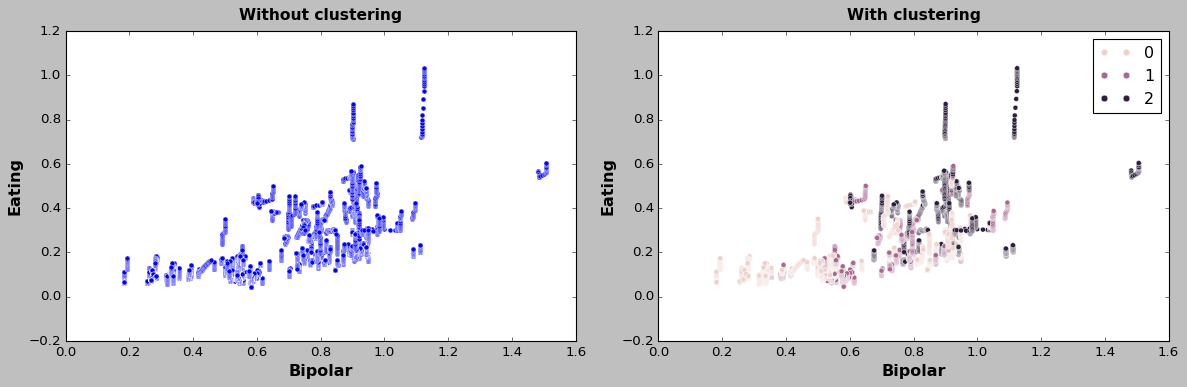

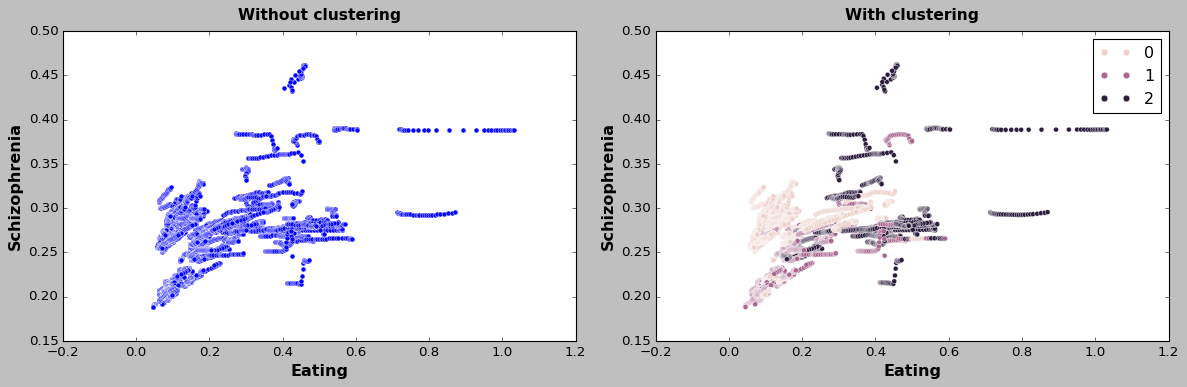

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=labels_Km).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=labels_Km).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=labels_Km).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=labels_Km).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=labels_Km).set_title('With clustering');

**8-6 MeanShift**


MeanShift is a clustering algorithm that belongs to the category of unsupervised learning. It assigns data points to clusters iteratively by shifting them toward the mode, which refers to the region with the highest density of data points in the context of MeanShift.

In [ ]:
cluster_meanS = MeanShift(bandwidth=1).fit(df[features])

In [ ]:
labels_MS = cluster_meanS.labels_
set(cluster_meanS.labels_)

{0, 1, 2}

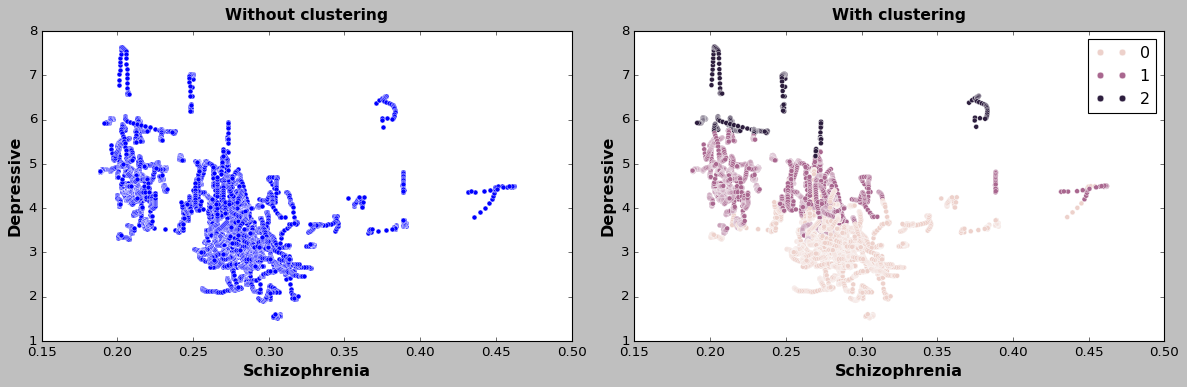

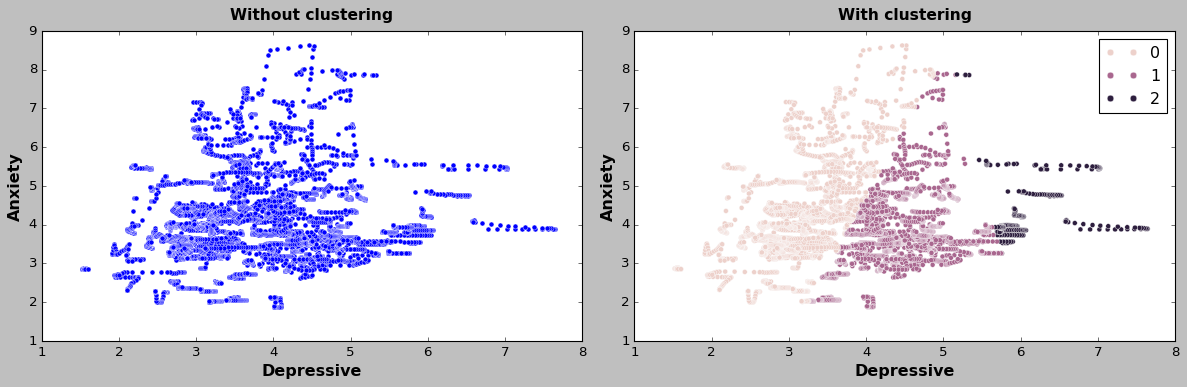

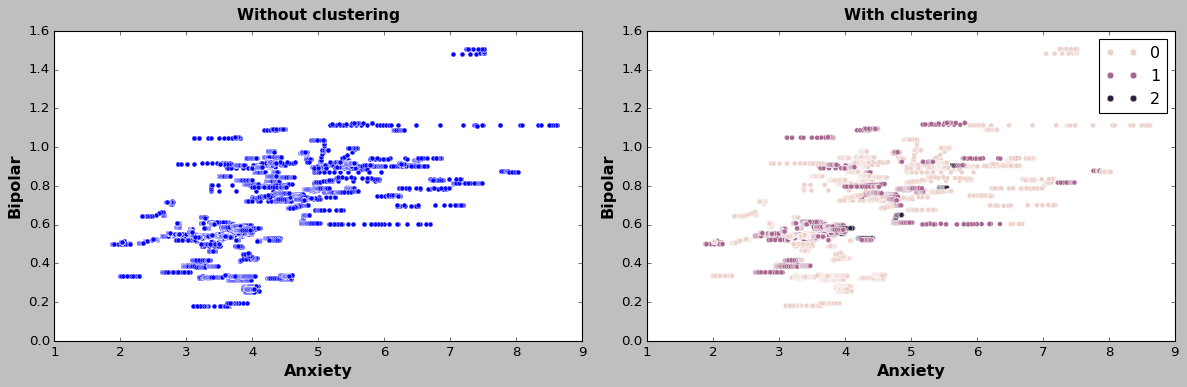

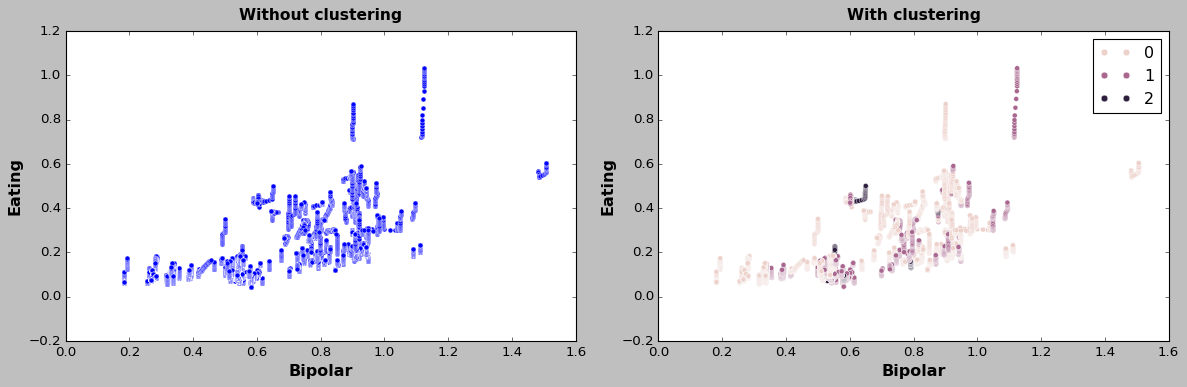

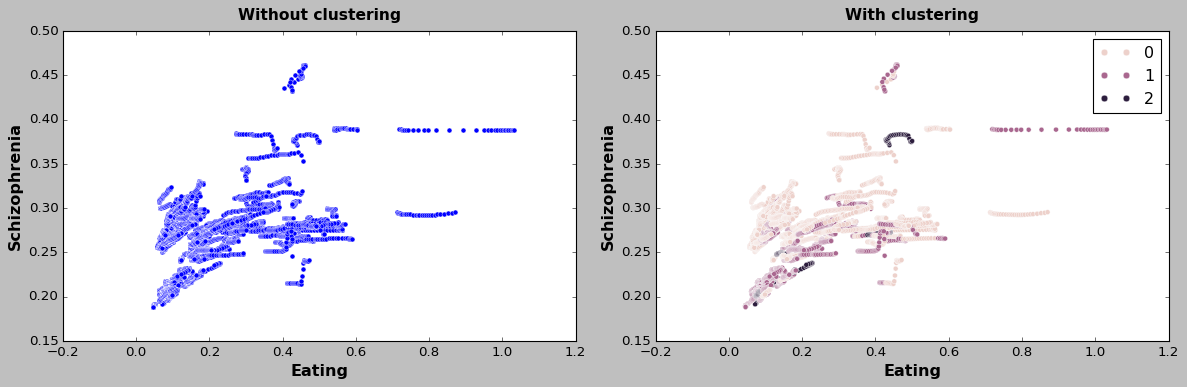

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=labels_MS).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=labels_MS).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=labels_MS).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=labels_MS).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=labels_MS).set_title('With clustering');

**8-7 SpectralClustering**


Spectral Clustering is a type of clustering algorithm that utilizes the connectivity between data points to form clusters. It employs eigenvalues and eigenvectors of the data matrix to project the data into a lower-dimensional space for clustering. This method is based on the concept of representing data as a graph, where each data point is a node, and the similarity between points is represented by edges.

In [ ]:
cluster_SC = SpectralClustering(n_clusters=3,assign_labels='discretize',
                                   random_state=0).fit(df[features])

In [ ]:
label_SC = cluster_SC.labels_
set(cluster_SC.labels_)

{0, 1, 2}

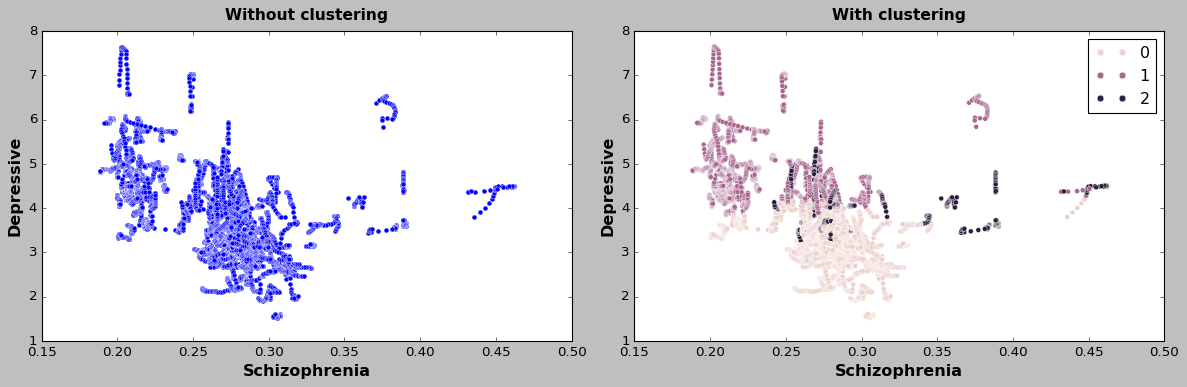

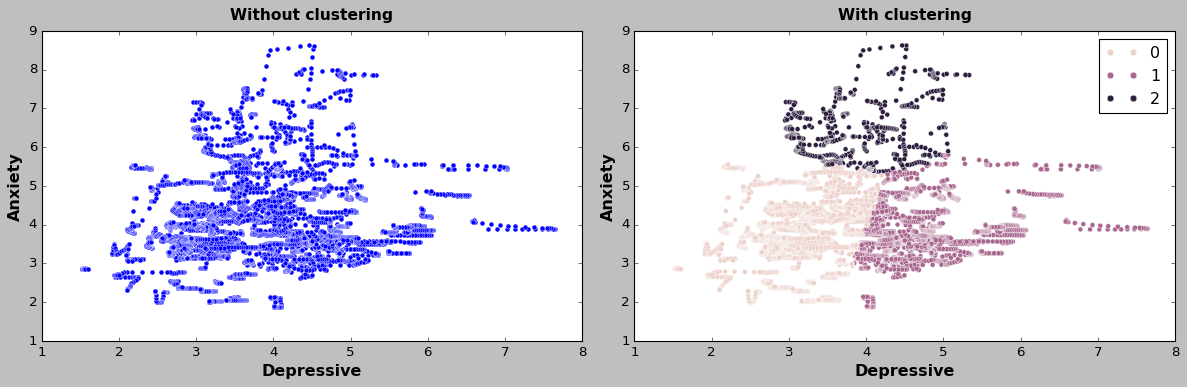

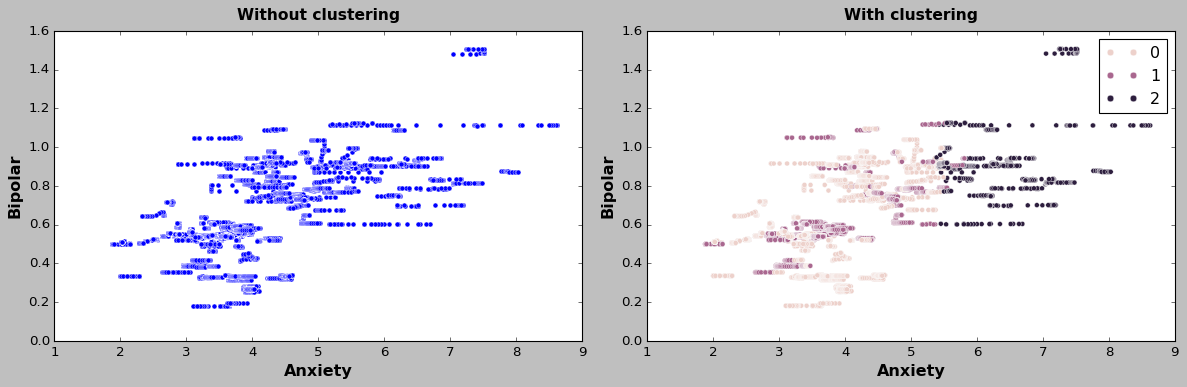

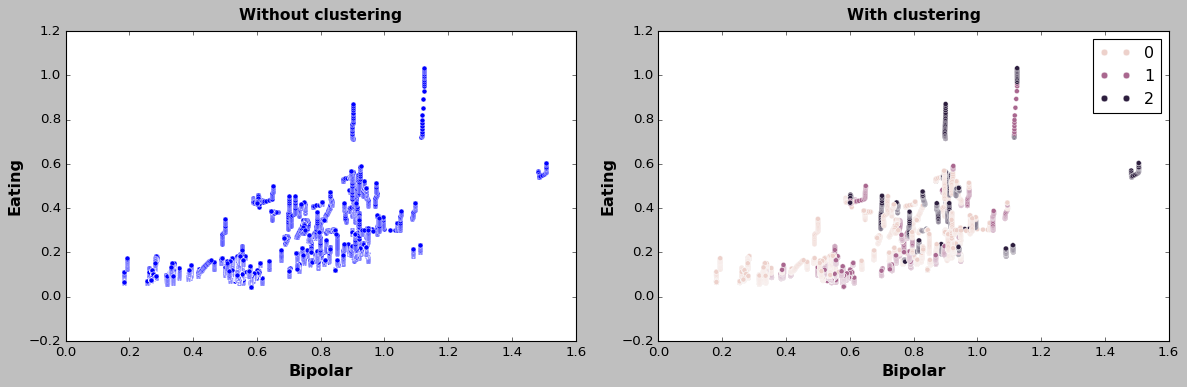

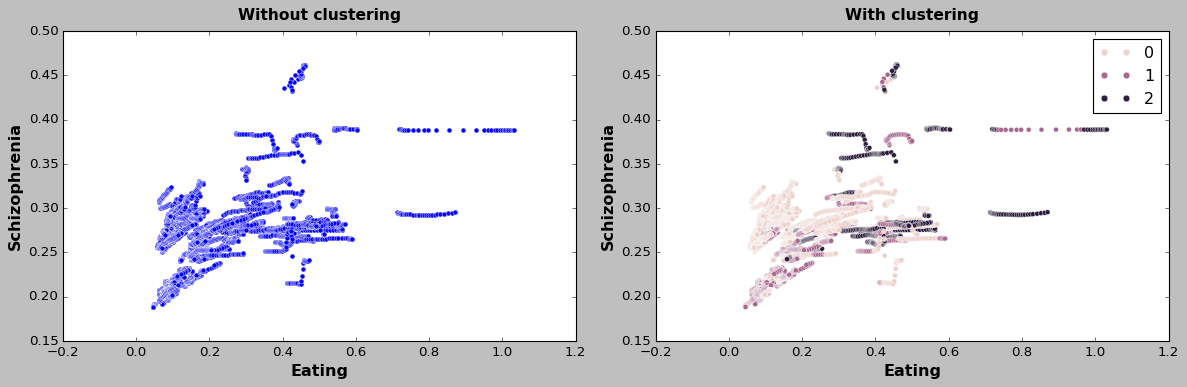

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=label_SC).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=label_SC).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=label_SC).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=label_SC).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=label_SC).set_title('With clustering');

**9- Conclusion**

Upon evaluating the performance of each algorithm, we observe that K-means, Spectral, and Agglomerative clustering are well-suited for the main dataset, while Meanshift, DBSCAN, Birch, and Minibatch perform poorly. This visualization assessment can help identify the best algorithm for specific cases. In this instance, we can confidently use the first three algorithms.
